In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
import pymc3 as mc3

%matplotlib inline

C:\Users\bobal\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
qb = pd.read_csv('input/qb/qb_loc_cleaned.csv')
qb.tail()

,games,year,Name,Team,Week,Opponent,att,comp%,yds,td,def_rk,h/a_1,surface_0,points
2423,9,2018,Joe Webb,HOU,8,MIA,0,0.0,0,0,27,1.0,0.0,0.0
2424,14,2018,Teddy Bridgewater,NO,8,MIN,0,0.0,0,0,3,0.0,0.0,0.0
2425,19,2018,Brandon Weeden,HOU,8,MIA,0,0.0,0,0,27,1.0,0.0,-0.1
2426,2,2018,Joshua Dobbs,PIT,8,CLE,0,0.0,0,0,12,1.0,1.0,-0.1
2427,22,2018,Brian Hoyer,NE,8,BUF,0,0.0,0,0,9,0.0,0.0,-0.2


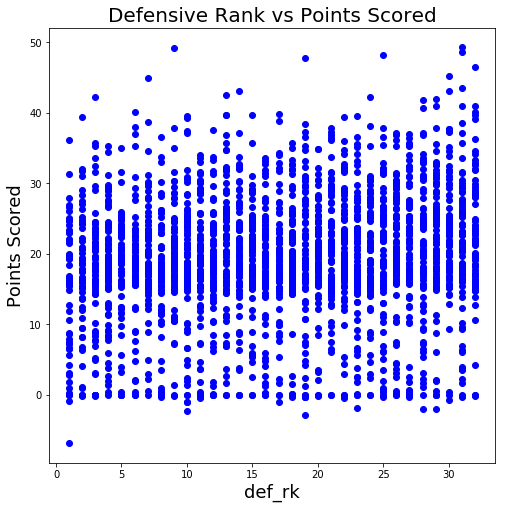

In [9]:
plt.figure(figsize=(8, 8))

plt.plot(qb['def_rk'], qb['points'], 'bo');
plt.xlabel('def_rk', size = 18); plt.ylabel('Points Scored', size = 18); 
plt.title('Defensive Rank vs Points Scored', size = 20);

In [3]:
qb.shape

(2428, 14)

In [50]:
qb.groupby(['Name','games']).sum()[['year','points']]

year  points
Name              games              
AJ McCarron       1      2015   18.00
Aaron Rodgers     1      2012   22.82
                  2      2012   10.16
                  3      2012   10.62
                  4      2012   28.06
                  5      2012   25.10
                  6      2012   39.22
                  7      2012   25.68
                  8      2012   13.84
                  9      2012   26.02
                  10     2012   15.74
                  11     2012   10.96
                  12     2012   14.94
                  13     2012   14.12
                  14     2012   25.94
                  15     2012   32.78
                  16     2012   28.60
                  17     2013   28.62
                  18     2013   37.90
                  19     2013   15.76
                  20     2013   20.70
                  21     2013   23.60
                  22     2013   22.50
                  23     2013   22.22
                  24     2014   32.64
                  25     2014   31.88
                  26     2014   18.24
                  27     2014   25.96
                  28     2014   24.30
                  29     2014   29.82
...                       ...     ...
Tyrod Taylor      12     2015   19.02
                  13     2015   27.30
                  14     2015   18.38
                  15     2016   25.38
                  16     2016   17.36
                  17     2016   16.64
                  18     2016   15.76
                  19     2016   20.96
                  20     2016   24.34
                  21     2016   18.12
                  22     2016   26.86
                  23     2016   20.44
                  24     2016   16.32
                  25     2016   15.86
                  26     2016   34.16
                  27     2017   19.76
                  28     2017   17.82
                  29     2017   20.02
                  30     2017   16.70
                  31     2017   27.90
                  32     2017   19.12
                  33     2017   23.16
                  34     2017   15.66
                  35     2018   24.58
                  36     2018   15.44
                  37     2018    2.96
Zach Mettenberger 1      2014   17.86
                  2      2014   17.52
                  3      2014   23.60
                  4      2015   16.18

[2354 rows x 2 columns]

In [77]:
min_lst = []
for player in qb_group.index.levels[0]:
    min_lst.append(qb_group.loc[player]['points'].min())
min_df = pd.DataFrame(columns = ['player','min_points'])
min_df['player'] = [player for player in qb_group.index.levels[0]]
min_df['min_points'] = min_lst
min_df

,player,min_points
0,AJ McCarron,18.00
1,Aaron Rodgers,10.16
2,Alex Smith,0.00
3,Andrew Luck,5.10
4,Andy Dalton,5.94
5,Austin Davis,25.98
6,Baker Mayfield,9.84
7,Ben Roethlisberger,8.76
8,Blaine Gabbert,-1.04
9,Blake Bortles,8.90


In [79]:
max_lst = []
for player in qb_group.index.levels[0]:
    max_lst.append(qb_group.loc[player]['points'].max())
max_df = pd.DataFrame(columns = ['player','max_points'])
max_df['player'] = [player for player in qb_group.index.levels[0]]
max_df['max_points'] = max_lst
max_df`

,player,max_points
0,AJ McCarron,18.00
1,Aaron Rodgers,40.18
2,Alex Smith,40.64
3,Andrew Luck,39.66
4,Andy Dalton,35.32
5,Austin Davis,31.00
6,Baker Mayfield,21.98
7,Ben Roethlisberger,47.78
8,Blaine Gabbert,25.34
9,Blake Bortles,36.54


In [85]:
max_df.sort_values('max_points',ascending=False)[:30]


,player,max_points
40,Drew Brees,49.30
93,Peyton Manning,49.28
18,Cam Newton,48.60
90,Nick Foles,48.24
7,Ben Roethlisberger,47.78
88,Mitch Trubisky,46.46
98,Ryan Fitzpatrick,45.28
114,Tony Romo,44.94
83,Matt Ryan,43.16
96,Russell Wilson,43.12


In [87]:
min_df.sort_values('min_points', ascending=False)[:30]

,player,min_points
66,Kellen Moore,29.40
5,Austin Davis,25.98
28,Cody Kessler,24.74
72,Landry Jones,22.08
91,Patrick Mahomes,20.82
35,David Fales,20.40
76,Matt Barkley,18.92
58,Johnny Manziel,18.24
0,AJ McCarron,18.00
12,Brett Hundley,18.00


In [91]:
ar_2018  = qb_group.loc['Aaron Rodgers'][qb_group.loc['Aaron Rodgers']['year'] == 2018]
ar_2018

,year,Week,att,comp%,yds,td,def_rk,h/a_1,surface_0,points
games,,,,,,,,,,
68,2018,1,30,66.7,286,3,16,1.0,1.0,24.94
69,2018,2,42,71.4,281,1,24,1.0,1.0,16.04
70,2018,3,44,61.4,265,2,19,0.0,1.0,19.90
71,2018,4,40,55.0,298,1,3,1.0,1.0,17.02
72,2018,5,52,61.5,442,3,12,0.0,0.0,33.68
73,2018,6,46,54.3,425,2,26,0.0,1.0,31.40


In [95]:
x =ar_2018['points']
y =  qb_group.loc['Aaron Rodgers'][qb_group.loc['Aaron Rodgers']['points']]

bins = numpy.linspace(-10, 10, 100)

plt.hist(x, bins, alpha=0.5, label='x')
plt.hist(y, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

KeyError: '[22.82 10.16 10.62 28.06 25.1  39.22 25.68 13.84 26.02 15.74 10.96 14.94\n 14.12 25.94 32.78 28.6  28.62 37.9  15.76 20.7  23.6  22.5  22.22 32.64\n 31.88 18.24 25.96 24.3  29.82 39.6  31.84 19.76 27.92 30.88 18.72 24.44\n 23.06 22.26 37.92 16.26 18.54 19.6  36.96 25.12 19.08 26.62 19.42 23.56\n 19.42 26.4  17.86 27.74 33.84 27.18 32.54 32.34 26.12 16.96 21.24 40.18\n 37.2  20.54 23.52 28.82 23.06 24.04 24.9  24.94 16.04 19.9  17.02 33.68\n 31.4 ] not in index'

In [10]:
qb.sort_values(['Name','games'])

,games,year,Name,Team,Week,Opponent,att,comp%,yds,td,def_rk,h/a_1,surface_0,points
1459,1,2015,AJ McCarron,CIN,14,PIT,32,68.8,280,2,24,1.0,0.0,18.00
0,1,2012,Aaron Rodgers,GB,1,SF,44,68.0,303,2,5,1.0,1.0,22.82
39,2,2012,Aaron Rodgers,GB,2,CHI,32,69.0,219,1,31,1.0,1.0,10.16
74,3,2012,Aaron Rodgers,GB,3,SEA,39,67.0,223,0,1,0.0,0.0,10.62
113,4,2012,Aaron Rodgers,GB,4,NO,41,76.0,319,4,29,1.0,1.0,28.06
151,5,2012,Aaron Rodgers,GB,5,IND,32,63.0,235,3,13,0.0,0.0,25.10
188,6,2012,Aaron Rodgers,GB,6,HOU,37,65.0,338,6,10,0.0,0.0,39.22
221,7,2012,Aaron Rodgers,GB,7,LAR,37,81.0,342,3,11,0.0,1.0,25.68
252,8,2012,Aaron Rodgers,GB,8,JAX,35,63.0,186,2,14,1.0,1.0,13.84
287,9,2012,Aaron Rodgers,GB,9,ARI,30,47.0,218,4,23,1.0,1.0,26.02


In [37]:
qb_2015 = qb[qb['year']==2015]
week2_2015 = qb_2015[qb_2015['Week']==1]

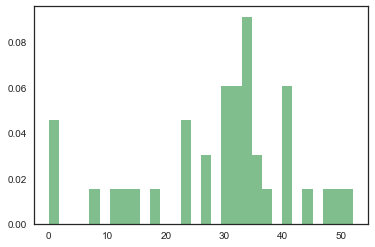

In [38]:
n, bins, patches = plt.hist(week1_2015['PassingAttempts'], 30, density=True, facecolor='g', alpha=0.75)


In [51]:
qb['salary'] = qb['salary'].apply(lambda x: int(x))

In [52]:
qb['salary'].mean()

5769.599109131404

In [53]:
qb_2016 = qb[qb['year']==2016]

qb_2017 = qb[qb['year']==2017]